  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  
              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.32000

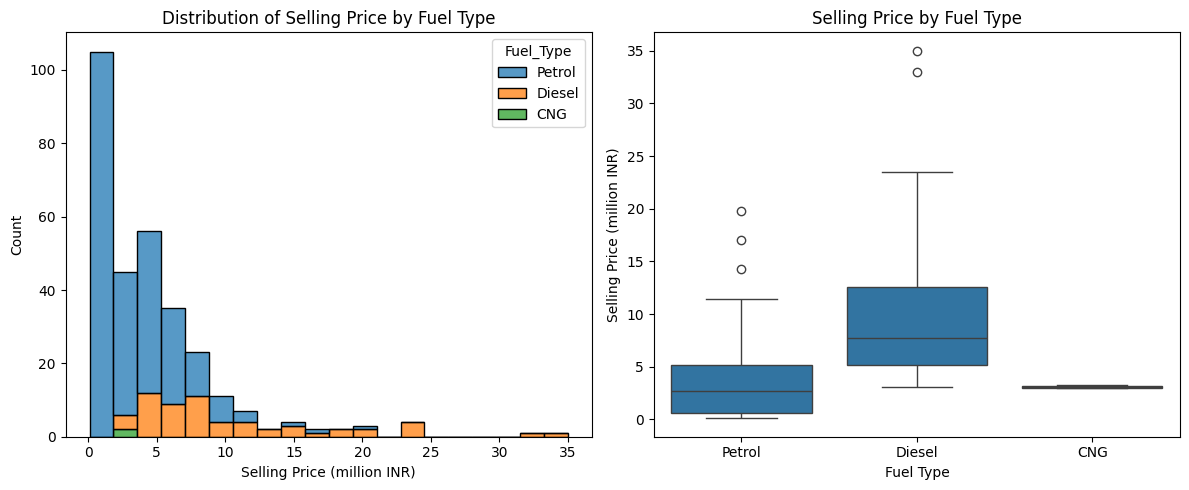

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка
df = pd.read_csv('car_data.csv')  # Укажи свой путь, если нужно
print(df.head())
print(df.describe())
print(df.isnull().sum())

# Визуализация
# Создаём фигуру с двумя графиками
plt.figure(figsize=(12, 5))

# Гистограмма с группировкой по Fuel_Type
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Selling_Price', hue='Fuel_Type', multiple='stack', bins=20)
plt.title('Distribution of Selling Price by Fuel Type')
plt.xlabel('Selling Price (million INR)')
plt.ylabel('Count')

# Boxplot (справа)
plt.subplot(1, 2, 2)
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df)
plt.title('Selling Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price (million INR)')

plt.tight_layout()
plt.show()

In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Загрузка
df = pd.read_csv('car_data.csv')

# Удаление ненужного
df = df.drop('Car_Name', axis=1)

# Кодирование категорий
le = LabelEncoder()
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])
df['Seller_Type'] = le.fit_transform(df['Seller_Type'])
df['Transmission'] = le.fit_transform(df['Transmission'])

# Обработка выбросов (опционально)
# Логарифмирование Selling_Price для уменьшения скошенности
df['Selling_Price'] = np.log1p(df['Selling_Price'])  # log(1+x) для избежания log(0)

# Стандартизация
scaler = StandardScaler()
numeric_cols = ['Year', 'Present_Price', 'Kms_Driven', 'Owner']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print(df.head())
print(df.describe())
print(df['Owner'].value_counts())

       Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  \
0  0.128897       1.470176      -0.236215   -0.256224          2            0   
1 -0.217514       1.749200       0.221505    0.155911          1            0   
2  1.168129       2.110213       0.257427   -0.773969          2            0   
3 -0.910335       1.348073      -0.403079   -0.817758          2            0   
4  0.128897       1.722767      -0.087890    0.141743          1            0   

   Transmission     Owner  
0             1 -0.174501  
1             1 -0.174501  
2             1 -0.174501  
3             1 -0.174501  
4             1 -0.174501  
               Year  Selling_Price  Present_Price    Kms_Driven   Fuel_Type  \
count  3.010000e+02     301.000000   3.010000e+02  3.010000e+02  301.000000   
mean  -2.931579e-14       1.411990  -9.442428e-17  5.901518e-17    1.787375   
std    1.001665e+00       0.805088   1.001665e+00  1.001665e+00    0.425801   
min   -3.681621e+00       0.0

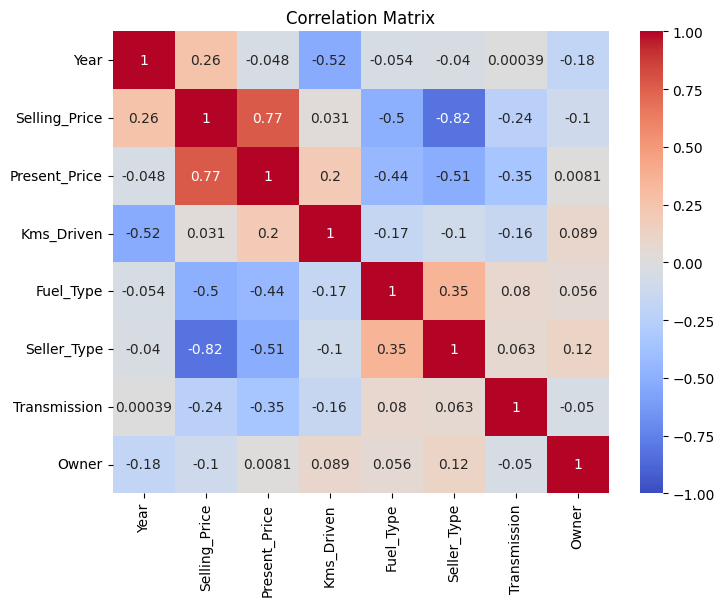

Важные признаки: ['Year', 'Selling_Price', 'Present_Price', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']
       Year  Selling_Price  Present_Price  Fuel_Type  Seller_Type  \
0  0.128897       1.470176      -0.236215          2            0   
1 -0.217514       1.749200       0.221505          1            0   
2  1.168129       2.110213       0.257427          2            0   
3 -0.910335       1.348073      -0.403079          2            0   
4  0.128897       1.722767      -0.087890          1            0   

   Transmission     Owner  
0             1 -0.174501  
1             1 -0.174501  
2             1 -0.174501  
3             1 -0.174501  
4             1 -0.174501  


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка (после предобработки)
df = pd.read_csv('car_data.csv')
# Повторяем предобработку
df = df.drop('Car_Name', axis=1)
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])
df['Seller_Type'] = le.fit_transform(df['Seller_Type'])
df['Transmission'] = le.fit_transform(df['Transmission'])
df['Selling_Price'] = np.log1p(df['Selling_Price'])
scaler = StandardScaler()
numeric_cols = ['Year', 'Present_Price', 'Kms_Driven', 'Owner']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Корреляционная матрица
corr = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Важные признаки (корреляция с Selling_Price > 0.1)
important_cols = corr['Selling_Price'][abs(corr['Selling_Price']) > 0.1].index
print("Важные признаки:", important_cols.tolist())

# Удаление слабых (опционально)
df_reduced = df[important_cols]
print(df_reduced.head())

Linear Regression:
RMSE: 0.03983025168595661
R2: 0.9347725449893036
XGBoost:
RMSE: 0.022161920515862445
R2: 0.9637068405995354


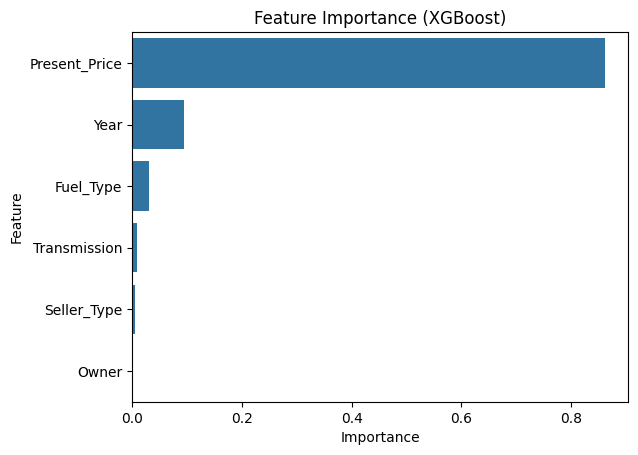

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Разделение
X = df_reduced.drop('Selling_Price', axis=1)
y = df_reduced['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Модель 1: Линейная регрессия
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Linear Regression:")
print("RMSE:", mean_squared_error(y_test, y_pred_lr))
print("R2:", r2_score(y_test, y_pred_lr))

# Модель 2: XGBoost
xgbr = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgbr.fit(X_train, y_train)
y_pred_xgb = xgbr.predict(X_test)
print("XGBoost:")
print("RMSE:", mean_squared_error(y_test, y_pred_xgb))
print("R2:", r2_score(y_test, y_pred_xgb))

# Важность признаков (XGBoost)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': xgbr.feature_importances_})
sns.barplot(x='Importance', y='Feature', data=feature_importance.sort_values(by='Importance', ascending=False))
plt.title('Feature Importance (XGBoost)')
plt.show()

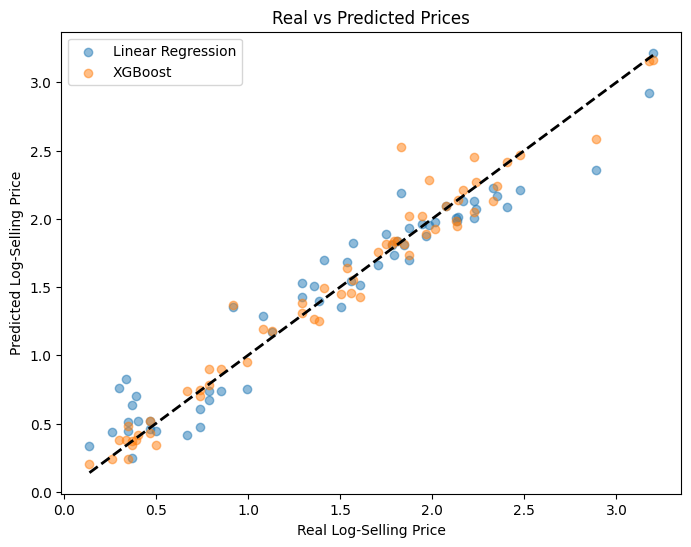

In [16]:
# Сравнение предсказаний и реальных значений
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, label='Linear Regression', alpha=0.5)
plt.scatter(y_test, y_pred_xgb, label='XGBoost', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Real Log-Selling Price')
plt.ylabel('Predicted Log-Selling Price')
plt.title('Real vs Predicted Prices')
plt.legend()
plt.show()